# Time Series

Some of the examples originated from https://github.com/lyndond/Analyzing_Neural_Time_Series

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

---
### Time Series vs. Probability Distributions

Previously in this class we described collections of sampled data points using probability distributions.

We made an important assumption about those data: every data point was **independent** from all the other data points.

*i.e.* Each sample knew nothing about the other samples.

However, in time series, nearby data points are typically **related** to each other.

---
### Autocorrelation

Correlation of a time series with itself, but shifted in time.

![ACF](acf_formula.jpg "ACF")

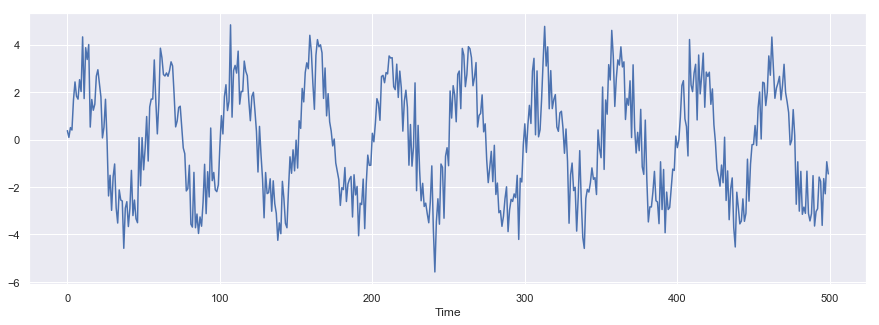

In [8]:
# a periodic time series with noise
time = np.arange(500)
waveform = 3 * np.sin(2 * np.pi * 1/50 * time) + np.random.randn(500)

plt.figure(figsize=(15, 5))
plt.plot(waveform)
plt.xlabel('Time');

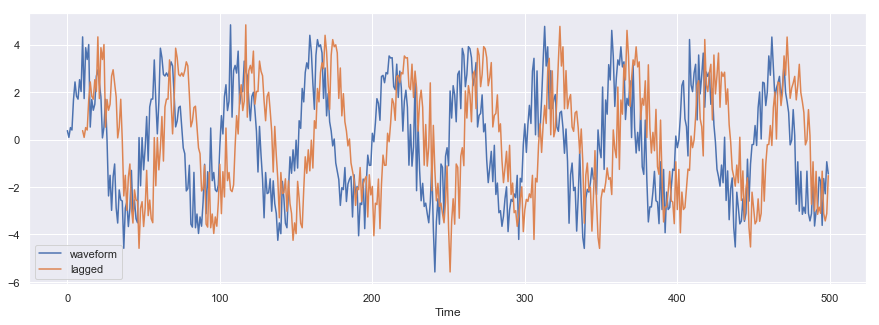

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(waveform, label='waveform')
plt.plot(np.arange(10, 500), waveform[:-10], label='lagged')  # lags the original by 10 time pts
plt.xlabel('Time')
plt.legend();

In [22]:
from statsmodels.tsa.stattools import acf

# correlation of waveform with itself for lags from 0-499 time points
autocorrelation = acf(waveform, nlags=500)

plt.figure(figsize=(15, 5))
plt.plot(autocorrelation)
plt.xlabel('Time');
plt.ylabel('Autocorrelation');

NameError: name 'waveform' is not defined

In [13]:
# adapted from example by Alex Huth

# interactive plots
%matplotlib widget

# may need to run this command in your shell to enable jupyterlab widgets:
# jupyter labextension install @jupyter-widgets/jupyterlab-manager
from ipywidgets import interact
import ipywidgets as widgets

plt.subplot2grid((2,3), (0,0), colspan=3)
waveform_line = plt.plot(waveform, '.-', label='waveform')
lagged_line = plt.plot(waveform, '.--', label='lagged')
plt.xlabel("Time")
plt.legend(loc='upper right')

plt.subplot2grid((2,3), (1,0), colspan=2)
autocorr_line = plt.plot(autocorrelation, '-', color='0.5')
autocorr_dot = plt.plot(0, autocorrelation[0], 'ko')
plt.ylabel("Autocorrelation")
plt.xlabel("Lag amount")

plt.subplot2grid((2,3), (1,2))
scatter_dots = plt.plot(waveform, waveform, '.')
absmax = np.abs(waveform).max()
plt.ylim(-absmax, absmax)
plt.xlim(-absmax, absmax)
plt.xlabel("lagged")
plt.ylabel("waveform")
plt.yticks([])
plt.xticks([])

def update(shift):
    lagged_line[0].set_data(np.arange(500 - shift), waveform[shift:])
    autocorr_dot[0].set_data(shift, autocorrelation[shift])
    if shift > 0:
        scatter_dots[0].set_data(waveform[shift:], waveform[:-shift])
    else:
        scatter_dots[0].set_data(waveform, waveform)

shift_slider = widgets.IntSlider(value=0, min=0, max=50, step=1)
interact(update, shift=shift_slider);

FigureCanvasNbAgg()

interactive(children=(IntSlider(value=0, description='shift', max=50), Output()), _dom_classes=('widget-intera…

In [4]:
eeg_data = np.array([ 7.99263716e-01,  3.20453477e+00,  2.32451677e+00,  2.99096251e+00,
        2.95125079e+00,  2.07323146e+00,  3.67824244e+00,  3.33407354e+00,
        3.18097234e+00,  2.57801104e+00,  2.56908560e+00,  2.23031139e+00,
        2.69823503e+00,  2.76596498e+00,  3.05247116e+00,  1.45715261e+00,
        3.36093020e+00,  3.17861724e+00,  3.18882823e+00,  2.84125400e+00,
        2.82957220e+00,  2.40654016e+00,  2.49908733e+00,  3.93868208e+00,
        3.28607726e+00,  2.90427375e+00,  2.35433936e+00,  2.01281786e+00,
        2.29527426e+00,  1.95660460e+00,  1.77596152e+00,  2.10410547e+00,
        2.30907845e+00,  2.73117661e+00,  3.16049576e+00,  3.11193728e+00,
        3.83683133e+00,  3.36231589e+00,  4.38690233e+00,  3.22657943e+00,
        4.06150150e+00,  3.98803377e+00,  3.33341861e+00,  4.67433119e+00,
        3.93356562e+00,  3.31128120e+00,  3.51423979e+00,  3.50051785e+00,
        2.83747530e+00,  2.86140251e+00,  2.93875647e+00,  2.66065621e+00,
        2.10540080e+00,  2.26423168e+00,  2.70363522e+00,  1.87502515e+00,
        2.24604321e+00,  1.85253787e+00,  1.10646093e+00,  1.93581748e+00,
        8.85520995e-01,  1.55400133e+00,  8.57437849e-01,  2.11681263e-03,
        3.31405520e-01,  7.15300024e-01,  8.17477554e-02,  1.01886165e+00,
        3.58378664e-02,  7.88056478e-02, -5.31301610e-02,  1.15285181e-02,
       -5.70677102e-01, -4.45085853e-01, -4.67251986e-01, -7.64465392e-01,
       -1.38555694e+00, -1.47661817e+00, -1.31803536e+00, -1.33042049e+00,
       -9.26028848e-01, -2.25337815e+00, -2.98349643e+00, -1.75738716e+00,
       -1.75983071e+00, -1.98427296e+00, -1.65334618e+00, -1.48713875e+00,
       -1.82748890e+00, -2.36522126e+00, -8.58658135e-01, -1.02472889e+00,
       -9.83468115e-01, -1.63966632e+00, -8.13248694e-01, -1.11178756e+00,
       -1.53469694e+00, -1.39900362e+00, -2.42044449e+00, -4.58633780e-01,
       -1.24245536e+00, -1.23174298e+00, -1.80914867e+00, -1.09792578e+00,
       -2.19788834e-01, -3.91566187e-01, -5.46141744e-01, -2.61245072e-01,
       -9.71207201e-01,  1.80505276e-01,  2.12751739e-02, -4.99209046e-01,
        2.77782142e-01, -6.39305830e-01, -1.51229575e-01, -3.92631769e-01,
        2.83742756e-01, -7.91099787e-01, -1.51982620e-01,  8.96941185e-01,
       -5.05389929e-01, -1.29613113e+00, -1.40133357e+00, -1.09832418e+00,
       -7.26004720e-01, -1.60111558e+00, -7.76258707e-01, -1.62094581e+00,
       -3.73068064e-01, -1.31551611e+00, -1.89829636e+00, -5.63772798e-01,
       -7.26958513e-01, -1.34779319e-01,  5.67472354e-02,  7.18996346e-01,
        8.75397101e-02, -3.74656409e-01,  2.15253636e-01,  3.95852208e-01,
       -6.99114382e-01, -2.36883461e-02, -3.51170272e-01, -3.83369088e-01,
       -3.83628339e-01, -3.63038123e-01, -5.20044565e-01, -5.60551345e-01,
       -8.50981951e-01,  2.15458959e-01, -4.07105505e-01, -6.80982172e-01,
       -6.56360015e-02, -2.86414862e-01, -3.25457484e-01, -5.09348452e-01,
        2.22844079e-01, -1.19338065e-01, -4.54005659e-01,  6.45172149e-02,
        5.45725524e-01,  2.27788508e-01,  2.14903280e-02, -7.68260896e-01,
        9.60702002e-02,  1.51404336e-01,  6.88524425e-01,  7.15013921e-01,
       -7.32056648e-02,  5.25893211e-01,  6.97088838e-01,  7.99444735e-01,
        7.21751750e-01,  7.19343781e-01,  1.17509313e-01,  8.96378636e-01,
        9.42050636e-01,  5.38066745e-01,  3.79113644e-01,  5.61982453e-01,
       -4.07359190e-02,  7.59371877e-01,  4.28462565e-01, -7.00114369e-01,
       -3.55375618e-01, -2.26157665e-01, -2.31882930e-01,  2.03893185e-02,
        5.77020347e-01,  1.96796566e-01, -4.78774756e-02,  8.14633369e-01,
        7.37142861e-01, -3.76670152e-01, -1.12248592e-01, -6.17118895e-01,
       -1.27434111e+00, -5.19831121e-01, -9.70791876e-01, -1.16911042e+00,
       -1.04738796e+00, -1.95756996e+00, -1.21118259e+00, -6.39578640e-01,
       -4.81419504e-01, -1.28147721e+00,  4.52927470e-01,  6.01281971e-02,
       -1.71167746e-01,  3.38981003e-01,  8.08044732e-01,  4.08845395e-01,
        7.25950837e-01,  1.24622834e+00, -6.14392698e-01, -2.85137951e-01,
        7.01438963e-01,  1.47698298e-01,  1.13267340e-01,  3.11485916e-01,
       -3.11249793e-01, -1.57307178e-01,  5.04421592e-01,  6.86937511e-01,
       -2.91096032e-01,  6.34591877e-02, -6.35234833e-01, -6.01996124e-01,
        3.39807719e-01, -1.27645910e-01, -1.28395230e-01, -7.85656393e-01,
        4.38407123e-01,  6.73599169e-02, -1.66758418e-01, -1.34611636e-01,
       -7.35705972e-01, -1.09363270e+00, -1.38281918e+00, -7.10241139e-01,
       -1.09283161e+00, -5.53040266e-01, -4.66702431e-01, -4.03561145e-01,
       -5.30590653e-01,  1.78266943e-01, -3.17033648e-01,  1.83481678e-01,
        6.48464024e-01, -4.26013172e-02,  2.03712925e-01, -5.36359809e-02,
        9.53794062e-01,  1.22623241e+00,  9.44951355e-01,  3.93549412e-01,
        9.23798084e-01,  1.24578214e+00,  2.29820862e-01,  1.29890192e+00,
        6.57313347e-01, -1.45417321e-02,  1.24840510e+00, -1.37040123e-01,
        1.20659336e-01, -1.36338517e-01, -1.55860901e-01, -6.87688053e-01,
       -1.04881160e-01, -7.32815742e-01,  1.19859003e-01, -9.33645129e-01,
       -5.00520945e-01, -5.21559119e-02, -7.68396258e-01,  3.34727943e-01,
        2.37182572e-01,  8.91254485e-01,  1.20330381e+00,  7.49721646e-01,
        3.45261842e-01, -4.81794178e-01, -2.19951034e+00, -7.01962769e-01,
       -9.17551219e-02,  1.03388143e+00,  6.83439016e-01,  2.31528234e+00,
        2.96089673e+00,  1.27630365e+00,  1.24336135e+00,  1.23832083e+00,
        5.46480156e-02,  1.18772888e+00,  1.58343065e+00,  1.49319077e+00,
        1.91689062e+00,  2.10358596e+00,  1.00890112e+00,  1.81117654e+00,
        2.33323407e+00,  2.60636306e+00,  2.39658380e+00,  3.98268080e+00,
        5.01225948e+00,  5.82258415e+00,  6.43058634e+00,  6.79025173e+00,
        6.63568068e+00,  6.13959980e+00,  5.67076635e+00,  2.99180984e+00,
        2.55179238e+00,  2.14307761e+00,  1.20502138e+00,  1.27293909e+00,
       -6.50303245e-01,  2.48398930e-01,  5.26413858e-01, -1.14647478e-01,
        5.48198402e-01,  1.02332436e-01, -5.16828656e-01, -5.20811856e-01,
        4.65165466e-01,  7.43647575e-01,  6.97913527e-01,  2.36138433e-01,
        4.95300561e-01,  9.00662661e-01,  1.47457266e+00,  8.27651203e-01,
        1.06250262e+00,  1.80036759e+00,  2.44940352e+00,  1.56416595e+00,
        1.92463088e+00,  2.53959322e+00,  3.88353729e+00,  3.15129471e+00,
        3.44999194e+00,  3.94891858e+00,  3.45071292e+00,  4.19435978e+00,
        4.46657228e+00,  3.82494617e+00,  5.02802515e+00,  5.18988800e+00,
        5.28867912e+00,  5.41830063e+00,  6.48895454e+00,  5.86283636e+00,
        4.81231689e+00,  6.03701115e+00,  5.48778725e+00,  4.74015713e+00,
        5.96341944e+00,  5.05302334e+00,  5.26999617e+00,  5.38548946e+00,
        5.35455275e+00,  4.81605339e+00,  4.67712212e+00,  4.40581465e+00,
        3.00225925e+00,  3.46769047e+00,  3.18293381e+00,  2.36635709e+00,
        3.16274619e+00,  2.70516753e+00,  1.92360783e+00,  3.54335833e+00,
        3.48667955e+00,  2.89500451e+00,  3.54918170e+00,  2.85223198e+00,
        2.89690518e+00,  2.49828672e+00,  3.69661188e+00,  2.58403468e+00,
        2.11900926e+00,  2.56375360e+00,  1.35088587e+00,  1.87456834e+00,
        2.13885880e+00,  2.20056129e+00,  1.37663054e+00,  1.15605521e+00,
        1.65966749e+00,  2.37382388e+00,  2.55429077e+00,  2.58696890e+00,
        2.24504018e+00,  2.49579763e+00,  2.78881860e+00,  2.93773699e+00,
        3.36445236e+00,  2.98386216e+00,  3.21965051e+00,  3.74506807e+00,
        3.21228123e+00,  3.08041286e+00,  2.91644502e+00,  2.43768978e+00,
        3.08618188e+00,  3.33929443e+00,  2.92517161e+00,  3.72959399e+00,
        2.56368136e+00,  2.86503339e+00,  3.40250134e+00,  3.67091918e+00,
        2.58703685e+00,  3.00237489e+00,  3.31698060e+00,  2.44217777e+00,
        2.45584464e+00,  2.36537671e+00,  2.48268294e+00,  1.17321336e+00,
        1.68265045e+00,  3.51674408e-01,  5.36619008e-01, -2.08302155e-01,
       -6.56199276e-01, -4.58073676e-01,  5.00213325e-01, -2.07337007e-01,
       -9.62419093e-01, -1.44099462e+00, -1.46004295e+00, -9.06552255e-01,
       -1.32168519e+00, -1.28357780e+00, -1.49933755e+00, -6.70274377e-01,
       -6.94029033e-02, -3.18246603e-01, -1.25560212e+00, -8.23934555e-01,
       -1.13600791e-01, -8.20176542e-01, -4.50547159e-01, -1.79742560e-01,
       -4.60703909e-01,  9.09724012e-02, -9.41872001e-02, -2.02221423e-01,
       -3.18800598e-01, -1.44873202e+00, -1.30087066e+00, -1.37254477e+00,
       -6.81825221e-01, -1.01894677e+00, -1.46897006e+00, -7.99088359e-01,
       -1.56381500e+00, -1.74938917e+00, -1.49962938e+00, -8.90134156e-01,
       -1.37595499e+00, -2.20422888e+00, -1.46084476e+00, -1.09440887e+00,
       -1.76983333e+00, -1.19331717e+00, -1.71766615e+00, -1.48415029e+00,
       -8.31143916e-01, -4.82468992e-01, -2.82775700e-01,  9.14366245e-02,
       -2.69199139e-03, -3.01332802e-01, -7.45271221e-02, -4.20184791e-01,
       -1.22812402e+00, -1.37936831e+00, -8.68966520e-01, -9.91255403e-01,
       -1.52929282e+00, -1.54256237e+00, -6.26470387e-01,  2.91609466e-01,
       -1.78308338e-01, -6.35619640e-01, -3.86198223e-01, -1.20093000e+00,
       -3.36084008e-01, -8.37850630e-01, -2.20345402e+00, -1.10333729e+00,
       -1.64029348e+00, -1.84588063e+00, -9.25052047e-01, -5.07705688e-01,
       -1.06458664e+00, -9.17084992e-01, -7.77340531e-02, -1.28067064e+00,
       -1.52685404e+00, -1.30454028e+00, -1.79453206e+00, -1.49469578e+00,
       -1.59027934e+00, -1.42655051e+00, -2.20504951e+00, -1.74353588e+00,
       -1.35293806e+00, -9.61870670e-01, -1.48502910e+00, -1.31604159e+00,
       -1.07369196e+00, -7.78178871e-01, -1.22767389e+00, -6.35363281e-01,
       -6.56373143e-01, -1.78796977e-01, -8.87847602e-01, -1.36769176e+00,
       -9.91862774e-01, -7.87249327e-01,  1.86417371e-01, -1.50543883e-01,
        2.38326371e-01, -6.78450406e-01, -8.36194813e-01, -1.07208848e+00,
       -1.02102232e+00, -1.28880215e+00, -9.17871416e-01,  9.84515920e-02,
       -1.58947396e+00, -1.40922034e+00,  1.96352769e-02, -8.56655061e-01,
       -1.28617561e+00, -1.09437263e+00, -5.77365637e-01, -2.32622695e+00,
       -1.11985362e+00, -1.72282672e+00, -1.89784348e+00, -1.27712226e+00,
       -8.60462666e-01, -2.96721339e-01, -6.63098633e-01, -6.23786390e-01,
       -7.51413345e-01,  4.29293305e-01,  3.01729232e-01, -1.34670341e+00,
       -9.95723128e-01, -3.71817231e-01,  4.09305751e-01, -1.59630626e-02,
       -9.80625451e-02,  3.51011038e-01,  7.96382844e-01,  2.61920959e-01,
        9.21876490e-01,  7.46048272e-01,  1.13343775e+00,  6.78247333e-01,
        9.56125975e-01,  9.15520966e-01,  7.82550514e-01,  8.55496407e-01,
        4.98154640e-01,  1.39871943e+00,  2.26936007e+00,  1.12895000e+00,
        5.25742292e-01,  1.93512022e+00,  2.32314658e+00,  1.36178887e+00,
        1.10633755e+00,  8.95384610e-01, -1.09561421e-01,  5.72895885e-01,
        2.23975137e-01, -6.34047627e-01,  3.86874646e-01, -5.91705620e-01,
       -6.14648581e-01, -7.32012033e-01, -4.29314226e-01,  6.48588717e-01,
        7.43330047e-02, -7.30401158e-01,  9.27372813e-01,  1.03928447e+00,
        3.08574084e-02,  1.55580020e+00,  9.27467525e-01,  7.78156996e-01,
        3.62426251e-01,  3.82276297e-01,  4.18154329e-01,  2.51854837e-01,
        1.28925478e+00,  1.18367541e+00,  1.83900499e+00,  5.40414393e-01,
        9.69204664e-01,  1.15556860e+00,  1.77076936e+00,  1.31623912e+00,
       -4.47926402e-01,  9.67909455e-01,  1.85925221e+00,  7.73959160e-01,
        4.20467347e-01, -1.02765188e-01,  5.45462191e-01,  1.39935005e+00,
        6.38551831e-01,  6.59032166e-01,  3.19662429e-02,  2.42156193e-01,
        1.66032538e-01,  4.60133910e-01, -3.62305254e-01, -5.49979746e-01,
       -8.71138513e-01, -8.66470575e-01, -7.29283571e-01, -4.87421989e-01,
        2.91809645e-02, -4.68097329e-01, -8.86694074e-01, -6.16590142e-01,
       -4.00639534e-01, -9.24395502e-01, -1.54553580e+00, -1.07156992e+00,
       -1.37063849e+00, -1.09150434e+00, -1.20975053e+00, -7.97084928e-01])

In [18]:
with open("eeg_data.dat", "rb") as f:
    time_ms, eeg_data = pickle.load(f)

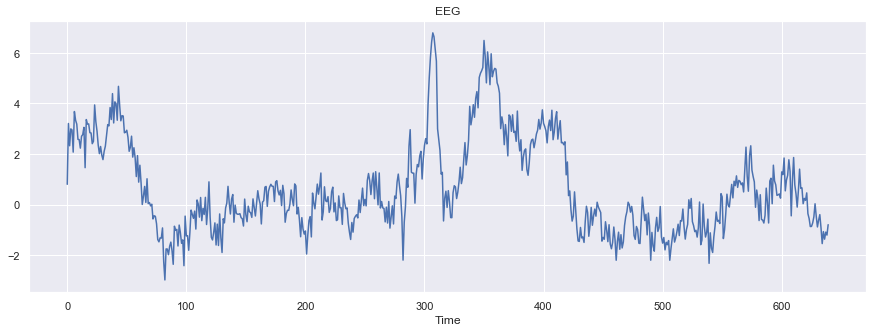

In [20]:
# back to regular plots
%matplotlib inline

plt.figure(figsize=(15, 5))
plt.plot(eeg_data)
plt.xlabel('Time');
plt.title('EEG');

In [21]:
autocorrelation = acf(eeg_data, nlags=600)

plt.figure(figsize=(15, 5))
plt.plot(autocorrelation)
plt.xlabel('Lag');

NameError: name 'acf' is not defined

---
### White Noise

A sequence of completely random numbers with mean zero is white noise.

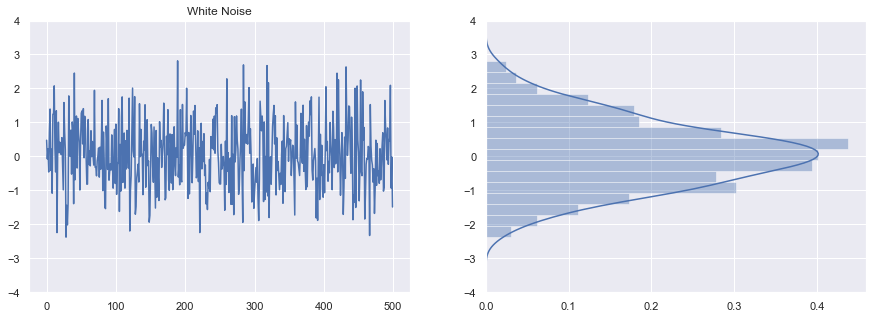

In [19]:
whitenoise = np.random.randn(500)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(whitenoise)
ax[0].set_ylim([-4, 4])
ax[0].set_title('White Noise')

sns.distplot(whitenoise, vertical=True, ax=ax[1])
ax[1].set_ylim([-4, 4]);

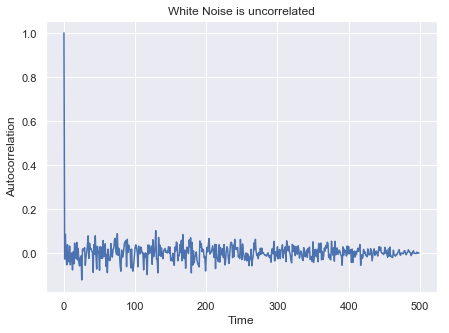

In [20]:
# white noise is uncorrelated, even neighboring time points are unrelated
autocorrelation = acf(whitenoise, nlags=500)

plt.figure(figsize=(7, 5))
plt.plot(autocorrelation)
plt.xlabel('Time')
plt.ylabel('Autocorrelation')
plt.title('White Noise is uncorrelated');

---
### Sines and Cosines refresher

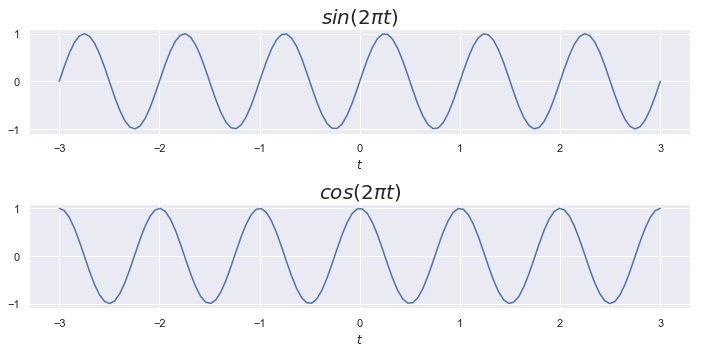

In [47]:
t = np.linspace(-3, 3, 120)

fig = plt.figure(figsize=(10, 5))

plt.subplot(211)
plt.plot(t, np.sin(2 * np.pi * t))
plt.xlabel('$t$')
plt.title('$sin(2 \pi t)$', fontsize=20)

plt.subplot(212)
plt.plot(t, np.cos(2 * np.pi * t))
plt.xlabel('$t$')
plt.title('$cos(2 \pi t)$', fontsize=20)

fig.tight_layout();

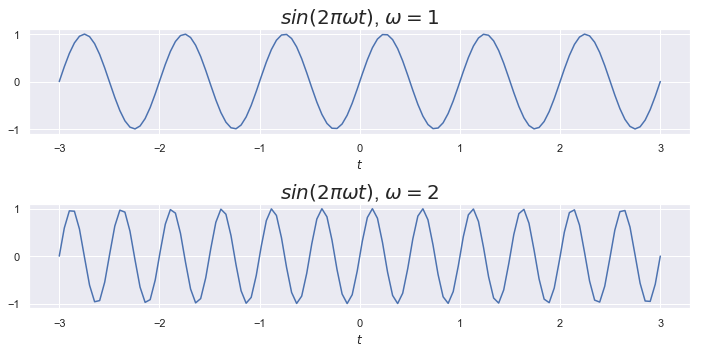

In [50]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(211)
plt.plot(t, np.sin(2 * np.pi * 1 * t))
plt.xlabel('$t$')
plt.title('$sin(2 \pi \omega t)$, $\omega = 1$', fontsize=20)

plt.subplot(212)
plt.plot(t, np.sin(2 * np.pi * 2 * t))
plt.xlabel('$t$')
plt.title('$sin(2 \pi \omega t)$, $\omega = 2$', fontsize=20)

fig.tight_layout();

---
### Sampling

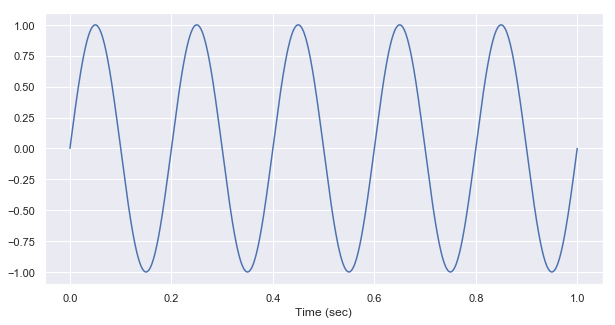

In [21]:
sample_freq_Hz = 1000  # 1000 samples per second is one sample per millisecond

dt_sec = 1 / sample_freq_Hz  # time between samples is 0.001 sec = 1 ms

time_sec = np.arange(0, 1 + dt_sec, dt_sec)  # array of time points at the sample rate

cycle_freq_Hz = 5  # 5 cycles per second --> each cycle takes 0.2 sec

waveform = np.sin(2 * np.pi * cycle_freq_Hz * time_sec)  # sinusoidal waveform

plt.figure(figsize=(10, 5))
plt.plot(time_sec, waveform)
plt.xlabel('Time (sec)');

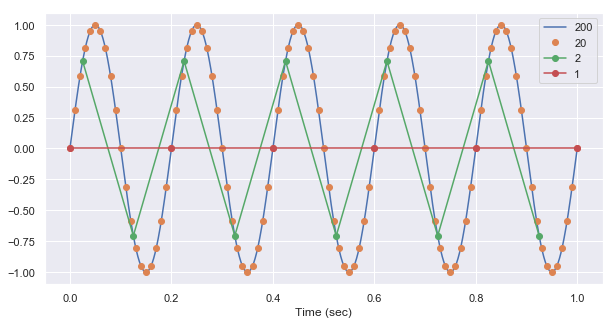

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(time_sec, waveform, label='200')  # 200 samples per cycle
plt.plot(time_sec[::10], waveform[::10], 'o', label='20')  # 20 samples per cycle
plt.plot(time_sec[25::100], waveform[25::100], 'o-', label='2')  # 2 samples per cycle
plt.plot(time_sec[::200], waveform[::200], 'o-', label='1')  # 1 samples pe cycle
plt.xlabel('Time (sec)')
plt.legend();

---
### Nyquist

Minimum sampling frequency to resolve a signal is twice the frequency of the fastest component in the signal.

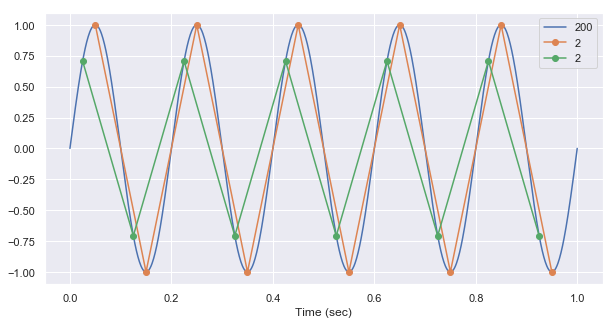

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(time_sec, waveform, label='200')  # 200 samples per cycle
plt.plot(time_sec[50::100], waveform[50::100], 'o-', label='2')  # 2 samples per cycle
plt.plot(time_sec[25::100], waveform[25::100], 'o-', label='2')  # 2 samples per cycle
plt.xlabel('Time (sec)')
plt.legend();

---
### Aliasing

Undersampling (e.g. below Nyquist) results in a low frequency alias artifact.

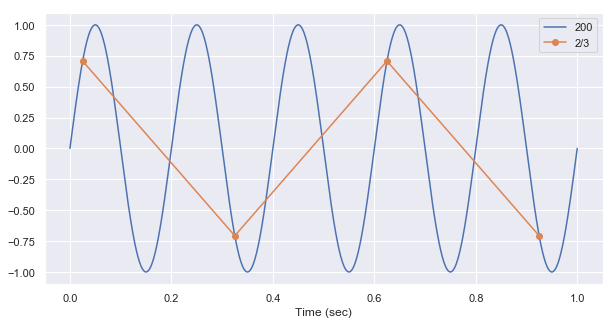

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(time_sec, waveform, label='200')  # 200 samples per cycle
plt.plot(time_sec[25::300], waveform[25::300], 'o-', label='2/3')  # 1 sample per 1.5 cycles
plt.xlabel('Time (sec)')
plt.legend();

---
### Convolution

![](convolution-equation1-2c.jpg)

![](convolution.png)

![](Convolution_of_box_signal_with_itself2.gif)

![](Convolution_of_spiky_function_with_box2.gif)

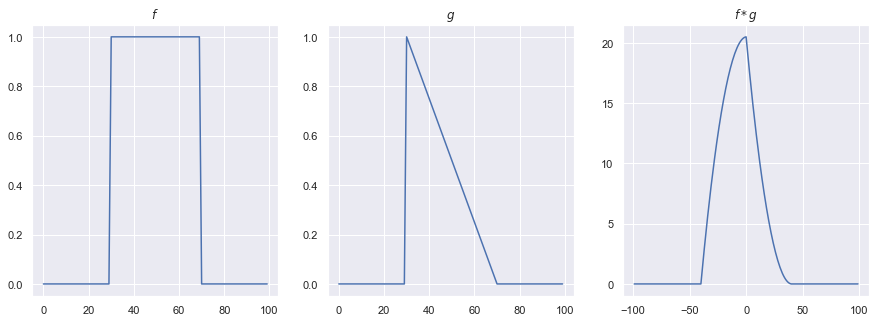

In [25]:
from scipy import signal

rect = np.zeros(100)
rect[30:-30] = 1

saw = np.zeros(100)
saw[30:-30] = np.arange(1, 0, -1/40)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(rect)
plt.title(r'$f$')

plt.subplot(132)
plt.plot(saw)
plt.title(r'$g$')

plt.subplot(133)
plt.plot(range(-len(saw) + 1, len(rect)), signal.convolve(rect, saw))
plt.title(r'$f*g$');

In [26]:
# interactive plots
%matplotlib widget

plt.figure(figsize=(10, 5))
plt.subplot(121)
fline = plt.plot(rect, label='f')
gline = plt.plot(np.flip(saw), label='g')
plt.legend()

plt.subplot(122)
conv = signal.convolve(rect, saw)
plt.plot(conv)
cdot = plt.plot(99, conv[99], '.', markersize=15)
plt.title(r'$f*g$');

def update(shift):
    gline[0].set_data(np.arange(shift, len(saw) + shift), np.flip(saw))
    cdot[0].set_data(99 + shift, conv[99 + shift])

shift_slider = widgets.IntSlider(value=0, min=-90, max=90, step=1)
interact(update, shift=shift_slider);

FigureCanvasNbAgg()

interactive(children=(IntSlider(value=0, description='shift', max=90, min=-90), Output()), _dom_classes=('widg…

### Convolution and Filtering

kernel = [0.25, 0.25, 0.25, 0.25]

waveform = [1, 2, 4, 1, 3, 5, 2, 2, 4, 3, 5, 1, 2]

1. Kernel starts at first point and operates on [1, 2, 4, 1] which results in 8/4 = 2. Convolution = [2, ...]
2. Slide kernel to the right one point to operate on [2, 4, 1, 3] which results in 10/4 = 2.5. Convolution = [2, 2.5, ...]
3. Slide kernel to the right one point to operate on [4, 1, 3, 5] which results in 13/4 = 3.25. Convolution = [2, 2.5, 3.25, ...]
4. Keep sliding kernel until it has passed over entire waveform. Convolutuion will be a filtered version of the original waveform where every point has become the average of itself and the three adjacent points.

For example:

![](kernel_1of3.png)

![](kernel_2of3.png)

![](kernel_3of3.png)

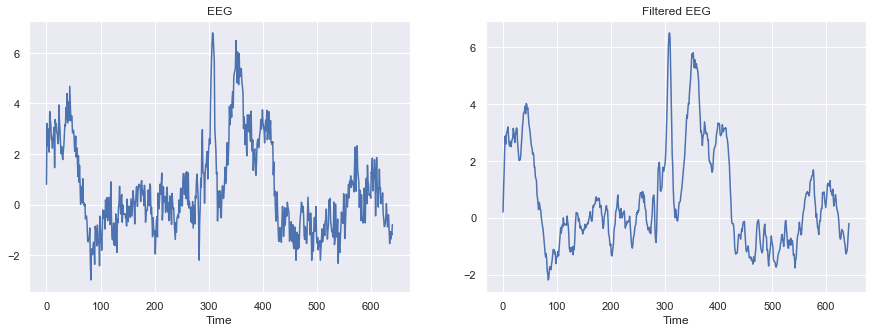

In [27]:
# back to regular plots
%matplotlib inline

# convolving with this kernel will take the average ov every 4 points
kernel = np.array([0.25, 0.25, 0.25, 0.25])

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(eeg_data)
plt.xlabel('Time');
plt.title('EEG');

plt.subplot(122)
plt.plot(signal.convolve(eeg_data, kernel))
plt.xlabel('Time');
plt.title('Filtered EEG');

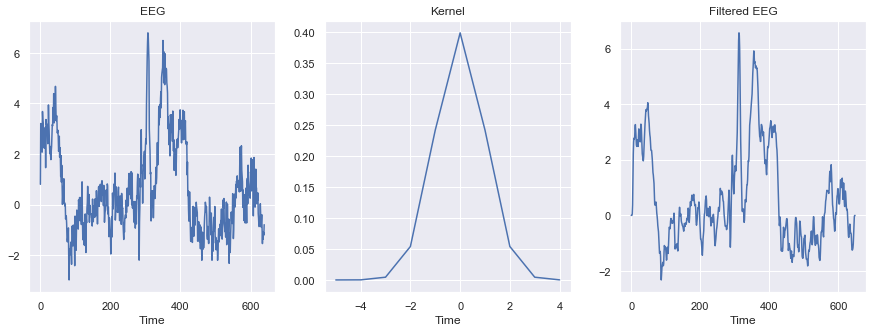

In [28]:
import scipy.stats as st

# convolving with a gaussian
x = np.arange(-5, 5)
kernel = st.norm.pdf(x)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(eeg_data)
plt.xlabel('Time');
plt.title('EEG');

plt.subplot(132)
plt.plot(x, kernel)
plt.xlabel('Time');
plt.title('Kernel');

plt.subplot(133)
plt.plot(signal.convolve(eeg_data, kernel))
plt.xlabel('Time');
plt.title('Filtered EEG');

In [68]:
# interactive plots
%matplotlib widget

x = np.arange(-10, 10)
kernel = st.norm.pdf(x)

plt.figure(figsize=(10, 5))
plt.subplot(121)
kline = plt.plot(x, kernel)
plt.xlabel('Time');
plt.title('Kernel');

plt.subplot(122)
cline = plt.plot(signal.convolve(eeg_data, kernel))
plt.xlabel('Time');
plt.title('Filtered EEG');

def update(sigma):
    kernel = st.norm.pdf(x, 0, sigma)
    conv = signal.convolve(eeg_data, kernel)
    kline[0].set_data(x, kernel)
    cline[0].set_data(range(len(conv)), conv)

sigma_slider = widgets.IntSlider(value=1, min=1, max=5, step=1)
interact(update, sigma=sigma_slider);

FigureCanvasNbAgg()

interactive(children=(IntSlider(value=1, description='sigma', max=5, min=1), Output()), _dom_classes=('widget-…

### Convolution and Probability Distributions

The distribution resulting from adding two random variables is the convolution of their distributions.

An interesting explanation of convolutions related to probability distributions: http://colah.github.io/posts/2014-07-Understanding-Convolutions/

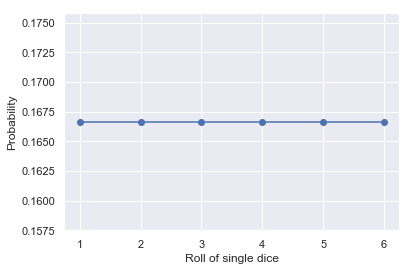

In [79]:
# back to regular plots
%matplotlib inline

# 6 sided dice with equal probability for each number
dice1 = np.ones((6,)) / 6

plt.plot(range(1, 7), dice1, 'o-')
plt.xlabel('Roll of single dice')
plt.ylabel('Probability');

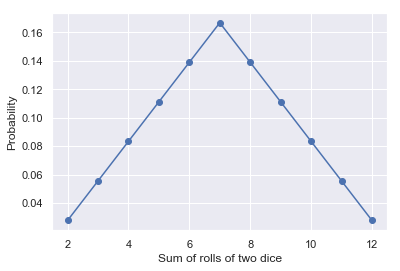

In [81]:
dice2 = signal.convolve(dice1, dice1)

plt.plot(range(2, 13), dice2, 'o-')
plt.xlabel('Sum of rolls of two dice')
plt.ylabel('Probability');

---
### Convoution in more than one dimension (e.g. images)

![](RiverTrain-ImageConvDiagram.png)

#### Kernel that blurs an image:

![](Gimp-Blur.png)

#### Kernel that hihglights vertical edges:

![](Gimp-Edge.png)

---
### EEG data

In [10]:
from scipy.io import loadmat

data = loadmat('sampleEEGdata.mat')

# grab relevant data
# each channel is an electrode, each trial is a separate EEG recording from that electrode
eeg_uV = data["EEG"][0,0]["data"]  # [channel, time, trial]
time_ms = data["EEG"][0,0]["times"][0]
samplefreq_Hz = float(data["EEG"][0,0]["srate"][0])

dt_ms = time_ms[1] - time_ms[0]

n_channels = eeg_uV.shape[0]
n_pts = eeg_uV.shape[1]
n_trials = eeg_uV.shape[2]

eeg_uV.shape, time_ms.shape, samplefreq_Hz, dt_ms, 1000 / dt_ms

((64, 640, 99), (640,), 256.0, 3.90625, 256.0)

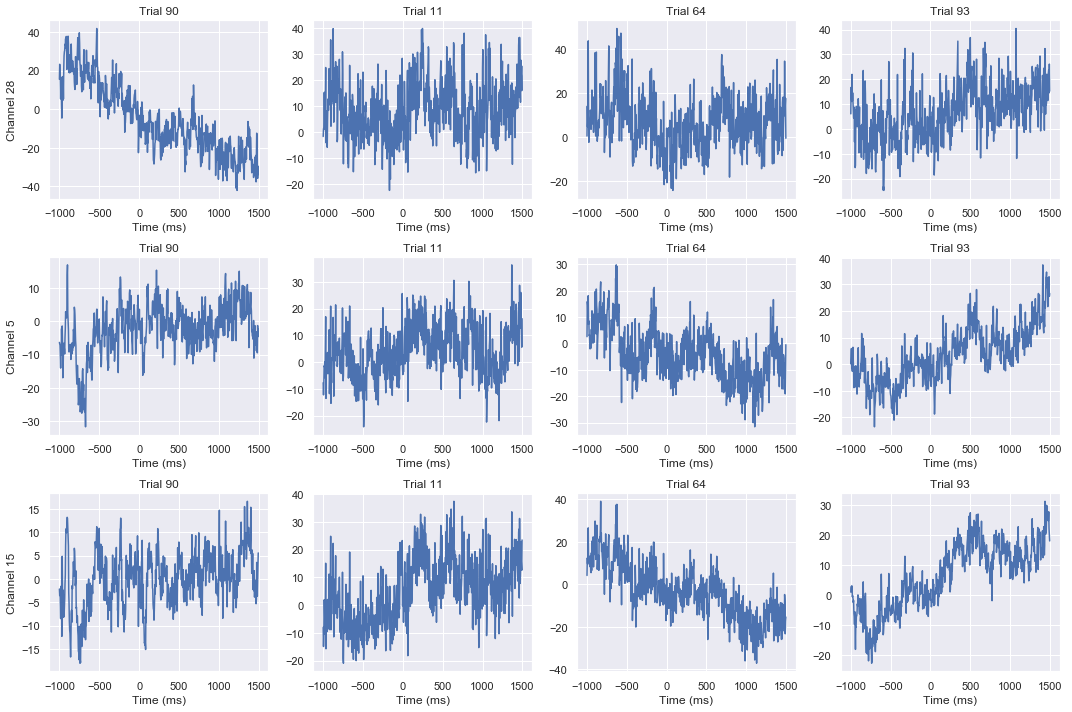

In [11]:
random_channels = np.random.choice(n_channels, size=3, replace=False)
random_trials = np.random.choice(n_trials, size=4, replace=False)

fig, ax = plt.subplots(3, 4, figsize=(15, 10))
for i in range(len(random_channels)):
    channel = random_channels[i]
    for j in range(len(random_trials)):
        trial = random_trials[j]
        ax[i, j].plot(time_ms, eeg_uV[channel, :, trial])
        ax[i, j].set_xlabel('Time (ms)')
        if j == 0:
            ax[i, j].set_ylabel(f'Channel {channel}')
        ax[i, j].set_title(f'Trial {trial}')
fig.tight_layout();

In [3]:
# Let's look at the FCz channel (electrode)
# !!! If this is confusing to you, you can skip ahead 7 cells without missing anything important to the main concepts.
channel_labels = data["EEG"][0,0]["chanlocs"][0]["labels"]

selected_channel = channel_labels == 'FCz'

selected_channel

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [72]:
np.where(selected_channel)

(array([46]),)

In [73]:
np.where(selected_channel)[0]

array([46])

In [74]:
np.where(selected_channel)[0][0]

46

In [79]:
channel_index = np.where(selected_channel)[0][0]

eeg_channel_uV = eeg_uV[channel_index, :, :]

eeg_channel_uV.shape

(640, 99)

In [80]:
eeg_channel_uV = eeg_uV[channel_labels == 'FCz', :, :]

eeg_channel_uV.shape

(1, 640, 99)

In [82]:
eeg_channel_uV = np.squeeze(eeg_uV[channel_labels == 'FCz', :, :])

eeg_channel_uV.shape

(640, 99)

In [12]:
# !!! If the above was confusing, you can skip it all in favor of the following:
eeg_channel_uV = eeg_uV[46, :, :]

eeg_channel_uV.shape

(640, 99)

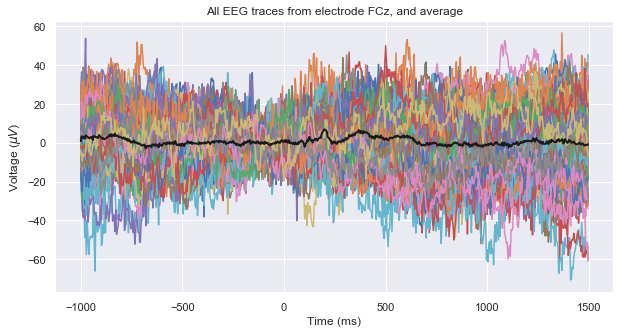

In [13]:
# event-related potential (ERP), i.e. the average time-domain signal
erp_uV = np.mean(eeg_channel_uV, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(time_ms, eeg_channel_uV)
plt.plot(time_ms, erp_uV, 'k', lw=2)
plt.xlabel('Time (ms)')
plt.ylabel(r'Voltage ($\mu V$)')  # latex interpreter looks for dollar signs
plt.title("All EEG traces from electrode FCz, and average");

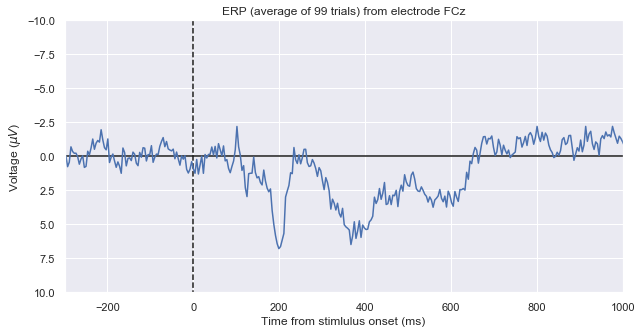

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(time_ms, erp_uV)
plt.vlines(0, -10, 10, linestyles='dashed')
plt.hlines(0, -1000, 1500)
plt.axis([-300, 1000, -10, 10])
plt.xlabel('Time from stimlulus onset (ms)')
plt.ylabel(r'Voltage ($\mu V$)')  # latex interpreter looks for dollar signs
plt.title(f'ERP (average of {n_trials} trials) from electrode FCz')
plt.gca().invert_yaxis();  # EEG convention to flip y axis

In [17]:
import pickle

with open("eeg_data.dat", "wb") as f:
    pickle.dump([time_ms, erp_uV], f)

---
### Exercise: Use convolution to filter the above ERP by averaging every 2 points. Again averaging every 10 points.

---
### Exercise: Filter the above ERP by convolving it with a Gaussian with a standard deviation of 50 ms.

---
### Exercise: Filter the above ERP by convolving it with an Exponential with a time constant of 50 ms.